In [11]:
import os
import torch
import matplotlib.pyplot as plt

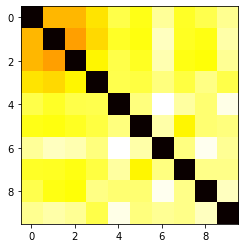

In [14]:
def get_embedding(path):
    return torch.load(path, map_location='cpu')['string_to_param']['*'].detach()

def get_embeddings(artist, attempt):
    logdirs = list(filter(lambda s: s.endswith(f'{artist}{attempt}'), os.listdir('logs')))
    if len(logdirs) != 1:
        print('Not unique')
        return
    path = f'logs/{logdirs[0]}/checkpoints'
    embedding_list = list(filter(lambda s: s.startswith(f'embeddings_gs'), os.listdir(path)))
    embedding_list = sorted(embedding_list, key=(lambda s: os.path.getctime(os.path.join(path, s))))
    return torch.cat(list(map(lambda s: get_embedding(os.path.join(path, s)), embedding_list)))
        
emb = torch.stack([get_embeddings('Alfred_Sisley', i)[-1, :] for i in range(5)] + \
    [get_embeddings('Pablo_Picasso', i)[-1, :] for i in range(5)])

dists = torch.cdist(emb, emb)
plt.imshow(dists, cmap='hot', interpolation='nearest')